In [54]:
# imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd 
# global array 
countries = ['United States', 'Canada', 'Mexico']

Data Sources:
 
https://ourworldindata.org/fish-and-overfishing#global-fish-production



**Wild Caught Data**

Wild Caught Data size: (14516, 4)


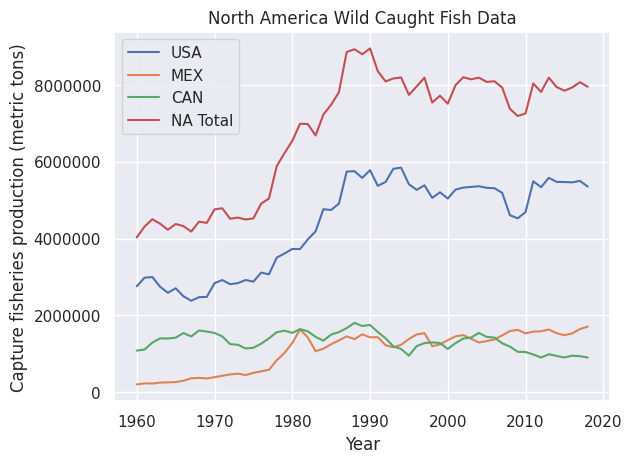

In [55]:
# total wild caught fish by country (does not include farmed fish)
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/capture-fishery-production.csv'
wild_caught_df = pd.read_csv(url)
print('Wild Caught Data size:', wild_caught_df.shape)

# drop non-essential columns 
wild_caught_df = wild_caught_df.drop(['Code'], axis=1)

# separate US data 
us_wild_data = wild_caught_df[wild_caught_df['Entity'] == 'United States']

# separate Mexico data 
mexico_wild_data = wild_caught_df[wild_caught_df['Entity'] == 'Mexico']

# separate Canada data 
canada_wild_data = wild_caught_df[wild_caught_df['Entity'] == 'Canada']

# separate and group North American data
NA_wild_data = wild_caught_df[wild_caught_df['Entity'].isin(countries)]
wild_grouped_NA = NA_wild_data.groupby('Year')['Capture fisheries production (metric tons)'].sum()

# plot US wild caught data
plt.plot(us_wild_data['Year'], us_wild_data['Capture fisheries production (metric tons)'], label='USA')

# plot Mexico wild caught data
plt.plot(mexico_wild_data['Year'], mexico_wild_data['Capture fisheries production (metric tons)'], label='MEX')

# plot Canada wild caught data
plt.plot(canada_wild_data['Year'], canada_wild_data['Capture fisheries production (metric tons)'], label='CAN')

# plot North America wild caught data 
plt.plot(wild_grouped_NA.index, wild_grouped_NA.values, label= 'NA Total')

# plot details and display 
plt.xlabel('Year')
plt.ylabel('Capture fisheries production (metric tons)')
plt.title('North America Wild Caught Fish Data')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()


**Aquaculture (farmed) Fish Data**

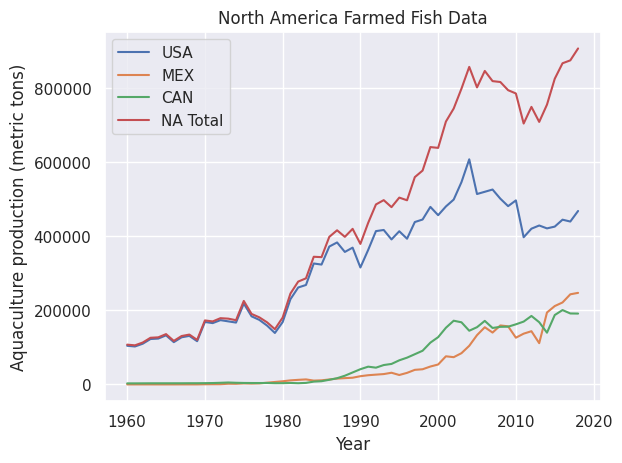

In [56]:
# total farmed fish by country (does not include wild caught fish)
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/aquaculture-farmed-fish-production.csv'
farmed_df = pd.read_csv(url)

# drop non-essential columns 
farmed_df = farmed_df.drop(['Code'], axis=1)

# separate US data 
us_farmed_data = farmed_df[farmed_df['Entity'] == 'United States']

# separate Mexico data 
mexico_farmed_data = farmed_df[farmed_df['Entity'] == 'Mexico']

# separate Canada data 
canada_farmed_data = farmed_df[farmed_df['Entity'] == 'Canada']

# separate and group North American data
NA_farmed_data = farmed_df[farmed_df['Entity'].isin(countries)]
farmed_grouped_NA = NA_farmed_data.groupby('Year')['Aquaculture production (metric tons)'].sum()

# plot US farmed data
plt.plot(us_farmed_data['Year'], us_farmed_data['Aquaculture production (metric tons)'], label='USA')

# plot Mexico farmed data
plt.plot(mexico_farmed_data['Year'], mexico_farmed_data['Aquaculture production (metric tons)'], label='MEX')

# plot Canada farmed data
plt.plot(canada_farmed_data['Year'], canada_farmed_data['Aquaculture production (metric tons)'], label='CAN')

# plot North America farmed data 
plt.plot(farmed_grouped_NA.index, farmed_grouped_NA.values, label= 'NA Total')

# plot details and display 
plt.xlabel('Year')
plt.ylabel('Aquaculture production (metric tons)')
plt.title('North America Farmed Fish Data')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()


**Wild Caught vs. Farmed Production**

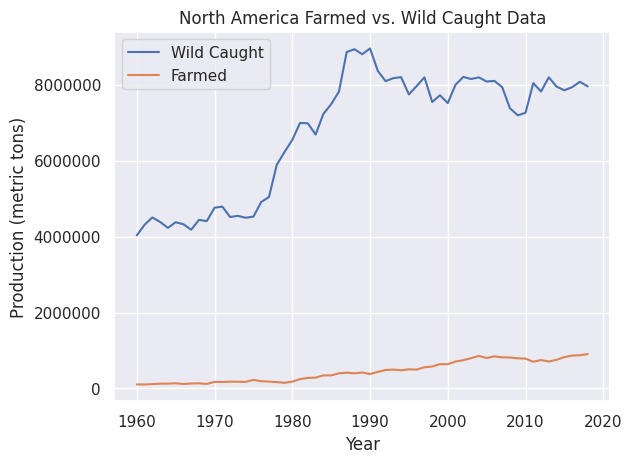

In [57]:
# plot North America wild caught data 
plt.plot(wild_grouped_NA.index, wild_grouped_NA.values, label= 'Wild Caught')

# plot North America farmed data
plt.plot(farmed_grouped_NA.index, farmed_grouped_NA.values, label= 'Farmed')

# plot details and display 
plt.xlabel('Year')
plt.ylabel('Production (metric tons)')
plt.title('North America Farmed vs. Wild Caught Data')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

**Fish and Seafood Consumption**

Max year 2017
Size of NA data: (57,)


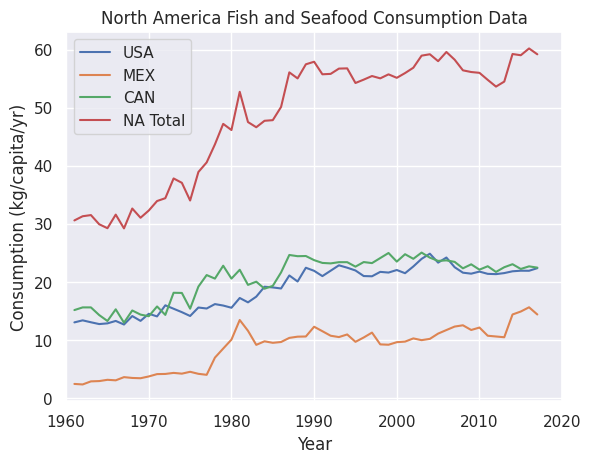

In [58]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/fish-and-seafood-consumption-per-capita.csv'
consumption_df = pd.read_csv(url)
consumption_df.rename(columns={'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)' : 'Consumption (kg/capita/yr)'}, inplace=True)
# print(consumption_df.head())
# print(us_data.head())
# print('Size of original data:', consumption_df.shape)
print('Max year', consumption_df['Year'].max())

# separate US data
us_data = consumption_df[consumption_df['Entity'] == 'United States']

# separate Mexico 
mexico_data = consumption_df[consumption_df['Entity'] == 'Mexico']

# separate Canada data
canada_data = consumption_df[consumption_df['Entity'] == 'Canada']

# separate and group North American data
NA_data = consumption_df[consumption_df['Entity'].isin(countries)]
grouped_NA = NA_data.groupby('Year')['Consumption (kg/capita/yr)'].sum()

# plot US consumption trends
# print('Size of US data:', us_data.shape)
plt.plot(us_data['Year'], us_data['Consumption (kg/capita/yr)'], label='USA')

# plot Mexico consumption trends
plt.plot(mexico_data['Year'], mexico_data['Consumption (kg/capita/yr)'], label='MEX')

# plot Canada consumption trends
plt.plot(canada_data['Year'], canada_data['Consumption (kg/capita/yr)'], label='CAN')


#plot North American consumption trends
print('Size of NA data:', grouped_NA.shape)
plt.plot(grouped_NA.index, grouped_NA.values, label= 'NA Total')

# plot details and display
plt.xlabel('Year')
plt.xlim(1960, 2020)
plt.ylabel('Consumption (kg/capita/yr)')
plt.title('North America Fish and Seafood Consumption Data')
plt.legend()
plt.show()